<a href="https://colab.research.google.com/github/ivanintelligence/project-reptile-classification-on-cifar-100-dataset-using-cnn/blob/main/project_reptile_classification_on_cifar_100_dataset_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Collection

**Import preliminary frameworks and libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt

**Load the "Reptiles" superclass from CIFAR-100 Dataset**

In [ ]:
# Load CIFAR-100 dataset
(train_images, train_labels_fine), (test_images, test_labels_fine) = cifar100.load_data(label_mode='fine')
(train_images_coarse, train_labels_coarse), (test_images_coarse, test_labels_coarse) = cifar100.load_data(label_mode='coarse')

# Define the index of the "Reptiles" superclass
REPTILES_INDEX = 15

# Allocate empty lists to hold indices for the superclass "Reptiles"
train_idx = [i for i, label in enumerate(train_labels_coarse) if label == REPTILES_INDEX]
test_idx = [i for i, label in enumerate(test_labels_coarse) if label == REPTILES_INDEX]

# Convert index list to numpy array
train_idx = np.array(train_idx)
test_idx = np.array(test_idx)

# Extract the fine class samples using the indices
reptiles_train_images = train_images[train_idx]
reptiles_train_labels = train_labels_fine[train_idx]
reptiles_test_images = test_images[test_idx]
reptiles_test_labels = test_labels_fine[test_idx]

**Visualize some images of the "Reptiles" superclass from CIFAR-100 Dataset**

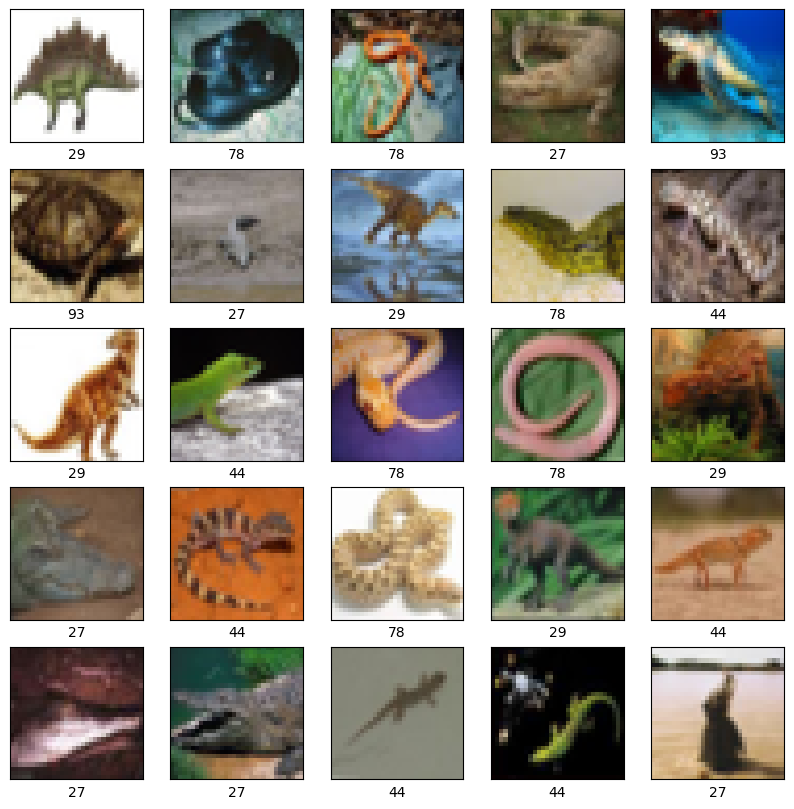

In [ ]:
# Visualize some images from the "Reptiles" superclass
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(reptiles_train_images[i], cmap=plt.cm.binary)
    plt.xlabel(reptiles_train_labels[i][0])
plt.show()

#Data Preprocessing

**Data Splitting** *(into Training, Validation, and Test Sets)*

In [ ]:
from sklearn.model_selection import train_test_split

# Split training data into training and validation sets
reptiles_train_images, reptiles_val_images, reptiles_train_labels, reptiles_val_labels = train_test_split(
    reptiles_train_images, reptiles_train_labels, test_size=0.2, random_state=42
)

**Feature Encoding**<br>
Label Encoding

In [ ]:
# Map original labels to new labels [0, 4]
unique_labels = np.unique(reptiles_train_labels)
label_mapping = {original: new for new, original in enumerate(unique_labels)}

# Apply mapping to training, test, and validation labels
reptiles_train_labels = np.array([label_mapping[label[0]] for label in reptiles_train_labels])
reptiles_test_labels = np.array([label_mapping[label[0]] for label in reptiles_test_labels])
reptiles_val_labels = np.array([label_mapping[label[0]] for label in reptiles_val_labels])

**Feature Normalization**

In [ ]:
# Normalize pixel values to be between 0 and 1
reptiles_train_images = reptiles_train_images / 255.0
reptiles_val_images = reptiles_val_images / 255.0
reptiles_test_images = reptiles_test_images / 255.0

**Data Augmentation** *(setting up the generator)*

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,  # Rotates the image within this range (degrees)
    width_shift_range=0.1,  # Shifts the image width by a maximum of 10%
    height_shift_range=0.1,  # Shifts the image height by a maximum of 10%
    horizontal_flip=True,  # Enables horizontal flip
    fill_mode='nearest',  # How to fill points outside the boundaries
)

#Model Selection & Training

*The model selected is Convolutional Neural Network. It consists of the following processes:*

*   *Convolution Layer + Activation Function (ReLU)*
*   *Pooling Layer (Max Pooling)*
*   *Flattening*
*   *Fully Connected Layer + Activation Functions (ReLU and Softmax)*

<br>**Regularization Techniques**
<br>Dropout


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

**Optimization Algorithms**<br>
Adam (Adaptive Moment Estimation)<br><br>
**Hyperparameter Tuning**<br>
*   Learning Rate

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Data Augmentation** (applying the generator to the Training Set only)<br><br>
**Hyperparameter Tuning**<br>
*   Batch Size
*   Epochs

<br>**Regularization Techniques**
<br>Early Stopping

In [ ]:
history = model.fit(datagen.flow(reptiles_train_images, reptiles_train_labels, batch_size=32),
                    epochs=50,
                    validation_data=(reptiles_val_images, reptiles_val_labels),
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/50
63/63 [==============================] - 4s 37ms/step - loss: 1.5595 - accuracy: 0.2830 - val_loss: 1.5129 - val_accuracy: 0.2640
Epoch 2/50
63/63 [==============================] - 1s 21ms/step - loss: 1.4831 - accuracy: 0.3265 - val_loss: 1.4288 - val_accuracy: 0.3900
Epoch 3/50
63/63 [==============================] - 1s 20ms/step - loss: 1.4121 - accuracy: 0.3785 - val_loss: 1.3817 - val_accuracy: 0.4260
Epoch 4/50
63/63 [==============================] - 1s 21ms/step - loss: 1.3938 - accuracy: 0.4030 - val_loss: 1.4434 - val_accuracy: 0.3980
Epoch 5/50
63/63 [==============================] - 1s 20ms/step - loss: 1.3788 - accuracy: 0.4145 - val_loss: 1.3709 - val_accuracy: 0.3960
Epoch 6/50
63/63 [==============================] - 1s 20ms/step - loss: 1.3221 - accuracy: 0.4425 - val_loss: 1.3273 - val_accuracy: 0.4720
Epoch 7/50
63/63 [==============================] - 2s 31ms/step - loss: 1.2975 - accuracy: 0.4685 - val_loss: 1.2261 - val_accuracy: 0.5040
Epoch 8/50
63

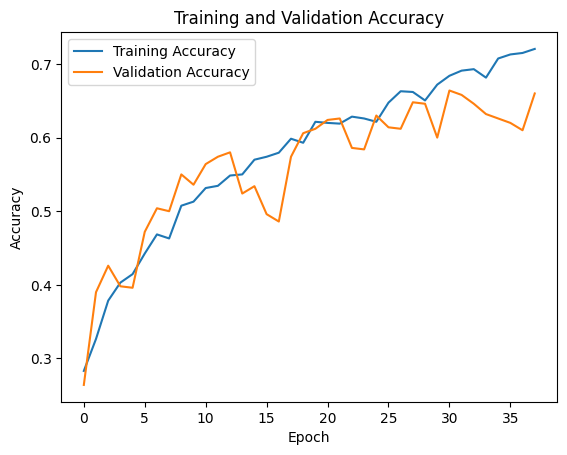

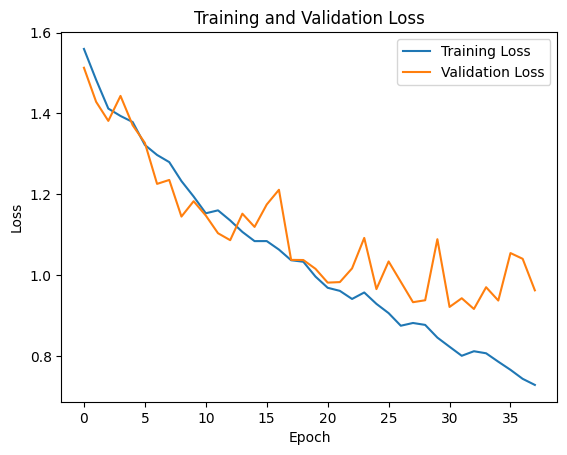

In [ ]:
import matplotlib.pyplot as plt

# Line Graph for Accuracy vs Val Accuracy Over Epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Line Graph for Loss vs Val Loss Over Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Model Evaluation

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(reptiles_test_images, reptiles_test_labels)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

16/16 [==============================] - 0s 3ms/step - loss: 0.9753 - accuracy: 0.6240
Test accuracy: 0.6240000128746033, Test loss: 0.9753087162971497


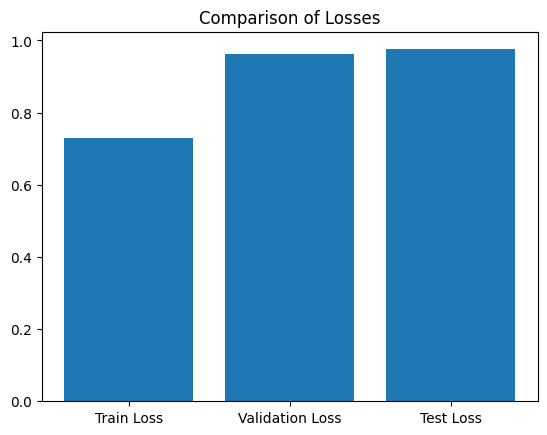

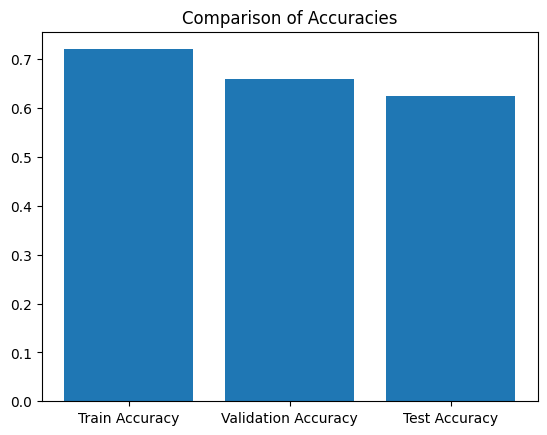

In [ ]:
# Bar Graph for Loss vs Val Loss vs Test Loss
plt.bar(['Train Loss', 'Validation Loss', 'Test Loss'], [history.history['loss'][-1], history.history['val_loss'][-1], test_loss])
plt.title('Comparison of Losses')
plt.show()

# Bar Graph for Accuracy vs Val Accuracy vs Test Accuracy
plt.bar(['Train Accuracy', 'Validation Accuracy', 'Test Accuracy'], [history.history['accuracy'][-1], history.history['val_accuracy'][-1], test_acc])
plt.title('Comparison of Accuracies')
plt.show()